## Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Baixar Recursos Necessários

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phkil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phkil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\phkil\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

## Criar lista, texto/sentimento


In [20]:
documentos = [
    (' '.join(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]
# Transformar em dataframe
df = pd.DataFrame(documentos, columns=['texto', 'sentimento'])
df.head

<bound method NDFrame.head of                                                   texto sentimento
0     plot : two teen couples go to a church party ,...        neg
1     the happy bastard ' s quick movie review damn ...        neg
2     it is movies like these that make a jaded movi...        neg
3     " quest for camelot " is warner bros . ' first...        neg
4     synopsis : a mentally unstable man undergoing ...        neg
...                                                 ...        ...
1995  wow ! what a movie . it ' s everything a movie...        pos
1996  richard gere can be a commanding actor , but h...        pos
1997  glory -- starring matthew broderick , denzel w...        pos
1998  steven spielberg ' s second epic film on world...        pos
1999  truman ( " true - man " ) burbank is the perfe...        pos

[2000 rows x 2 columns]>

## Processamento de texto

### Configurações de pré-processamento

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

### Função de processamento com remoção de números

In [22]:
def preprocessar_texto_remover_numeros(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    tokens = texto.split()
    tokens = [p for p in tokens if p not in stop_words]
    tokens = [stemmer.stem(p) for p in tokens]
    return tokens

def preprocessar_texto_mantendo_numeros(texto):
    texto = texto.lower()
    # permite dígitos além de letras e espaços
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    # usar split() para tokenizar; isto preserva números sem usar 'punkt'
    tokens = texto.split()
    tokens = [p for p in tokens if p not in stop_words]
    tokens = [stemmer.stem(p) for p in tokens]
    return tokens

### Contagem de sentimentos

In [23]:
contagem = df['sentimento'].value_counts()
print(f"Distribuição de sentimentos: {contagem}")

Distribuição de sentimentos: sentimento
neg    1000
pos    1000
Name: count, dtype: int64


### Vizualização

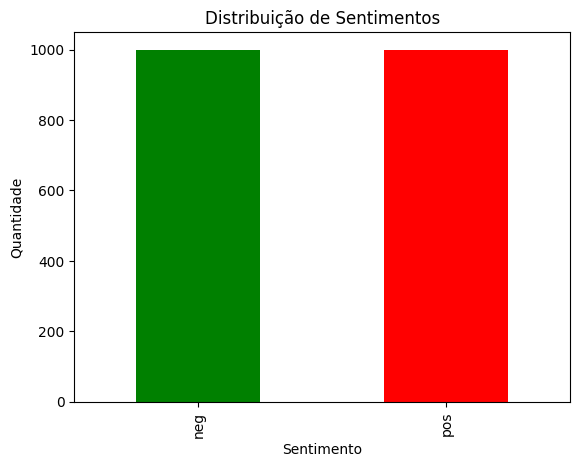

In [24]:
contagem.plot(kind='bar', color=['green', 'red'])
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.show()

## TF - IDF E BAG OF WORDS

In [25]:
# Aplicando pré-processamento
df['tokens'] = df['texto'].apply(preprocessar_texto_mantendo_numeros)

# Transformando tokens em string novamente para o vetorizer
df['texto_limpo'] = df['tokens'].apply(lambda lista: ' '.join(lista))

# BAG OF WORDS
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['texto_limpo'])

print("Matriz Bag of Words:")
print(X_bow.toarray())
print("\nFormato da matriz:", X_bow.toarray().shape)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['texto_limpo'])

print("\nMatriz TF-IDF:")
print(X_tfidf.toarray())
print("\nFormato da matriz:", X_tfidf.toarray().shape)

Matriz Bag of Words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Formato da matriz: (2000, 25780)

Formato da matriz: (2000, 25780)

Matriz TF-IDF:

Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Formato da matriz: (2000, 25780)

Formato da matriz: (2000, 25780)


### Análise dos resultados

In [27]:
vocab = vectorizer_bow.get_feature_names_out()
len(vocab)
print(vocab[:50])   
idf = vectorizer_tfidf.idf_
top_10_raras = sorted(zip(vocab, idf), key=lambda x: -x[1])[:10]
top_10_comuns = sorted(zip(vocab, idf), key=lambda x: x[1])[:10]
print("Raras:", top_10_raras)
print("Comuns:", top_10_comuns)

['00' '000' '0009f' '007' '03' '04' '05' '05425' '10' '100' '1000' '10000'
 '100m' '101' '102' '103' '104' '105' '106' '107' '108' '109' '10b' '10th'
 '11' '110' '111' '112' '113' '1138' '114' '115' '117' '118' '11th' '12'
 '121' '122' '123' '125' '126' '127' '1272' '128' '129' '1298' '12th' '13'
 '130' '1305']
Raras: [('0009f', np.float64(7.908255154023788)), ('03', np.float64(7.908255154023788)), ('04', np.float64(7.908255154023788)), ('05425', np.float64(7.908255154023788)), ('10000', np.float64(7.908255154023788)), ('104', np.float64(7.908255154023788)), ('109', np.float64(7.908255154023788)), ('10b', np.float64(7.908255154023788)), ('111', np.float64(7.908255154023788)), ('112', np.float64(7.908255154023788))]
Comuns: [('film', np.float64(1.104195111380416)), ('one', np.float64(1.1114314357489328)), ('movi', np.float64(1.1910552367627092)), ('like', np.float64(1.246400413478477)), ('make', np.float64(1.3220834991691133)), ('charact', np.float64(1.331785584975564)), ('time', np.flo